In [18]:

import sys
from pathlib import Path


import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import classification_report


from spnc import spnc_anisotropy
import spnc_ml as ml







In [19]:
def NRMSE(Y,Y_pred):
    var = np.var(Y)
    return np.sqrt(np.square(Y_pred-Y).mean()/var)

def NRMSE_list(y,y_pred):
    Y = np.array(y)
    Y_pred = np.array(y_pred)
    return(NRMSE(Y,Y_pred))

In [20]:
# NARMA10 parameters
Ntrain = 2000
Ntest = 1000

# Net parameters
Nvirt = 40
m0 = 1e-2
bias = True

# Reservoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 10

In [21]:
# Params
params = {
    'theta':1/3, 
    'gamma':.25, 
    'delay_feedback':0, 
    'Nvirt':Nvirt,
    'noise_enable': 'None',
    'noise_seed': 1234,
    'noise_mean':0.0001,
    'noise_std':0.00013,
    'train_sample': Ntrain*Nvirt,
    'test_sample': Ntest*Nvirt
}

In [22]:
spn = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,restart = False,Primep1=None)
transforms = spn.gen_signal_slow_delayed_feedback
transformf = spn.gen_signal_fast_delayed_feedback


seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  40
Deterministic mask will be used
1234
p1 in slow: 0.4999998889492148
noise_seed: 1234
noise_mean: 0.0001
len(K_s): 80000
train_samples: 80000
skip restarting..
noise-free output
Seed Training: 1234
p1 in slow: 0.49597909343201535
noise_seed: 1234
noise_mean: 0.0001
len(K_s): 40000
train_samples: 80000
skip restarting..
noise-free output
Spacer NRMSE:0
0.005254952787348485 0.6550362946496222


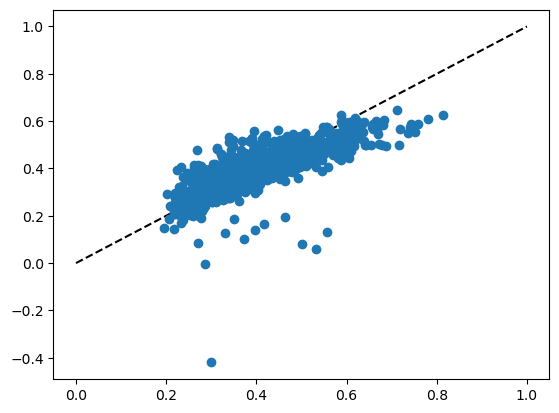

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  40
Deterministic mask will be used
1234
p1 in fast: 0.4969339088834572
len(K_s): 80000
train_samples: 80000
skip restarting..
noise-free output
Seed Training: 1234
p1 in fast: [0.49599307]
len(K_s): 40000
train_samples: 80000
skip restarting..
noise-free output
Spacer NRMSE:0
0.004762531581372221 0.623591072893647


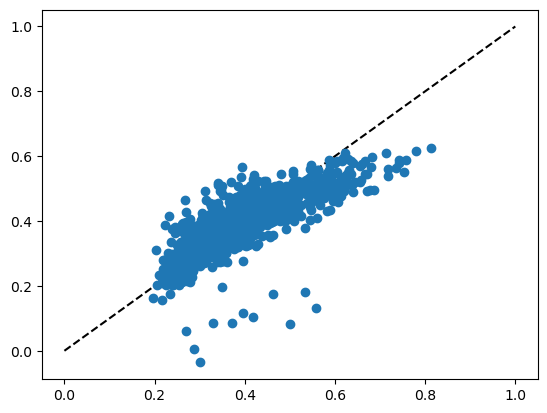

In [23]:
# run
(y_test_s,y_pred_s) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transforms,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)
(y_test_f,y_pred_f) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transformf,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)

Transform from new reservoir in between runs (no restart)

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  40
Deterministic mask will be used
1234
p1 in slow: 0.4999998889492148
noise_seed: 1234
noise_mean: 0.0001
len(K_s): 80000
train_samples: 80000
skip restarting..
noise-free output
Seed Training: 1234
p1 in slow: 0.49597909343201535
noise_seed: 1234
noise_mean: 0.0001
len(K_s): 40000
train_samples: 80000
skip restarting..
noise-free output
Spacer NRMSE:0
0.005254952787348485 0.6550362946496222


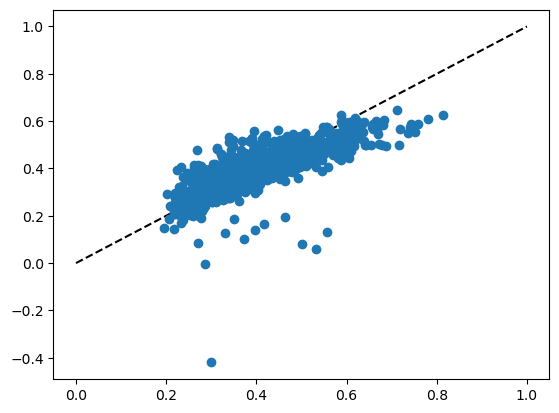

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  40
Deterministic mask will be used
1234
p1 in fast: 0.4999998889492148
len(K_s): 80000
train_samples: 80000
skip restarting..
noise-free output
Seed Training: 1234
p1 in fast: [0.49599308]
len(K_s): 40000
train_samples: 80000
skip restarting..
noise-free output
Spacer NRMSE:0
1.0971542224398991 9.464873076806915


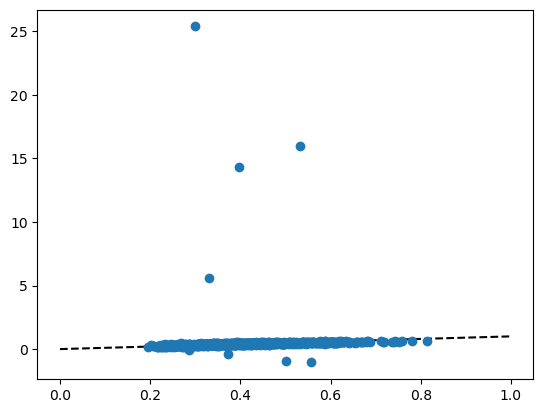

0.4888930615760112

In [24]:
# NARMA10 parameters
Ntrain = 2000
Ntest = 1000

# Net parameters
Nvirt = 40
m0 = 1e-2
bias = True

# Reservoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 10

# Params
params = {
    'theta':1/3, 
    'gamma':.25, 
    'delay_feedback':0, 
    'Nvirt':Nvirt,
    'noise_enable': 'None',
    'noise_seed': 1234,
    'noise_mean':0.0001,
    'noise_std':0.00013,
    'train_sample': Ntrain*Nvirt,
    'test_sample': Ntest*Nvirt
}


spn = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,restart = False,Primep1=None)
transforms = spn.gen_signal_slow_delayed_feedback

# run
(y_test_s,y_pred_s) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transforms,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)

spac = 50
NRMSE_list(y_test_f[spac:],y_pred_f[spac:])

spn = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,restart = False,Primep1=None)
transformf = spn.gen_signal_fast_delayed_feedback

# run
(y_test_f,y_pred_f) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transformf,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)

spac = 50
NRMSE_list(y_test_f[spac:],y_pred_f[spac:])


Look at some of the data

In [25]:
spac = 50
window = 100

plt.figure()
plt.plot(y_test_s[spac:spac+window])
plt.plot(y_pred_s[spac:spac+window])

plt.figure()
plt.plot(y_test_f[spac:spac+window])
plt.plot(y_pred_f[spac:spac+window])

plt.figure()
plt.plot(y_pred_s[spac:spac+window])
plt.plot(y_pred_f[spac:spac+window])

plt.figure()
plt.plot(y_pred_s[spac:spac+window]-y_pred_f[spac:spac+window])

print(NRMSE_list(y_test_s[spac:],y_pred_s[spac:]))
print(NRMSE_list(y_test_f[spac:],y_pred_f[spac:]))

0.5601789835931897
0.4888930615760112


Repeat above, but with restart on...

Initalise before

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  40
Deterministic mask will be used
1234
p1 in slow: 0.4999998889492148
noise_seed: 1234
noise_mean: 0.0001
len(K_s): 80000
train_samples: 80000
restarted
noise-free output
Seed Training: 1234
p1 in slow: 0.4999998889492148
noise_seed: 1234
noise_mean: 0.0001
len(K_s): 40000
train_samples: 80000
restarted
noise-free output
Spacer NRMSE:0
0.00524985814779629 0.654718691125495


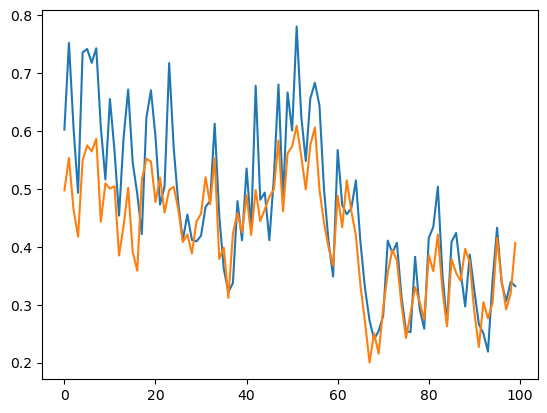

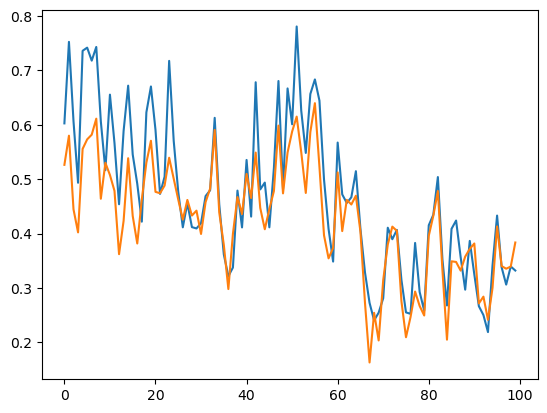

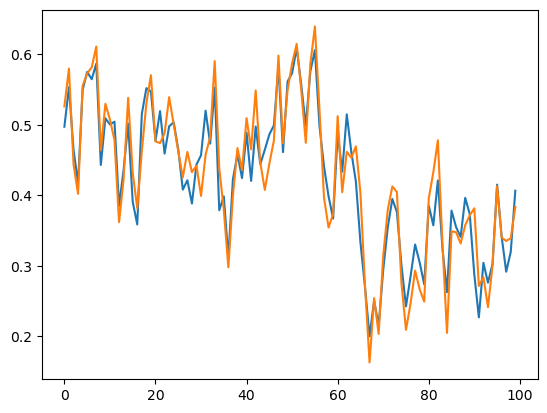

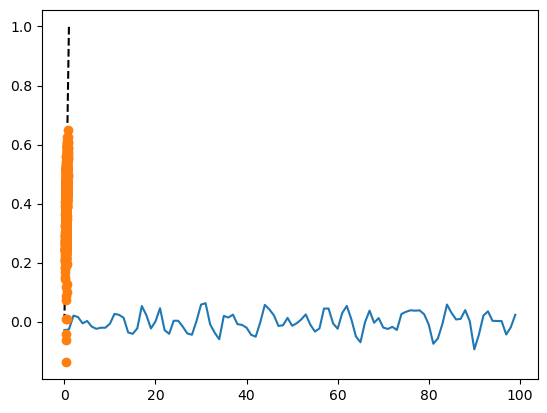

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  40
Deterministic mask will be used
1234
p1 in fast: 0.4999998889492148
len(K_s): 80000
train_samples: 80000
restarted
noise-free output
Seed Training: 1234
p1 in fast: 0.4999998889492148
len(K_s): 40000
train_samples: 80000
restarted
noise-free output
Spacer NRMSE:0
0.004155719694704212 0.5825109294768851


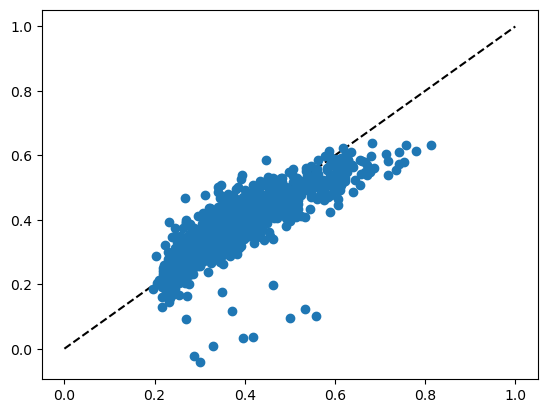

In [26]:
# NARMA10 parameters
Ntrain = 2000
Ntest = 1000

# Net parameters
Nvirt = 40
m0 = 1e-2
bias = True

# Reservoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 10

# Params
params = {
    'theta':1/3, 
    'gamma':.25, 
    'delay_feedback':0, 
    'Nvirt':Nvirt,
    'noise_enable': 'None',
    'noise_seed': 1234,
    'noise_mean':0.0001,
    'noise_std':0.00013,
    'train_sample': Ntrain*Nvirt,
    'test_sample': Ntest*Nvirt
}


spn = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,restart = True,Primep1=None)
transforms = spn.gen_signal_slow_delayed_feedback
transformf = spn.gen_signal_fast_delayed_feedback

# run
(y_test_s,y_pred_s) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transforms,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)
# run
(y_test_f,y_pred_f) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transformf,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)


Initalise between

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  40
Deterministic mask will be used
1234
p1 in slow: 0.4999998889492148
noise_seed: 1234
noise_mean: 0.0001
len(K_s): 80000
train_samples: 80000
restarted
noise-free output
Seed Training: 1234
p1 in slow: 0.4999998889492148
noise_seed: 1234
noise_mean: 0.0001
len(K_s): 40000
train_samples: 80000
restarted
noise-free output
Spacer NRMSE:0
0.00524985814779629 0.654718691125495


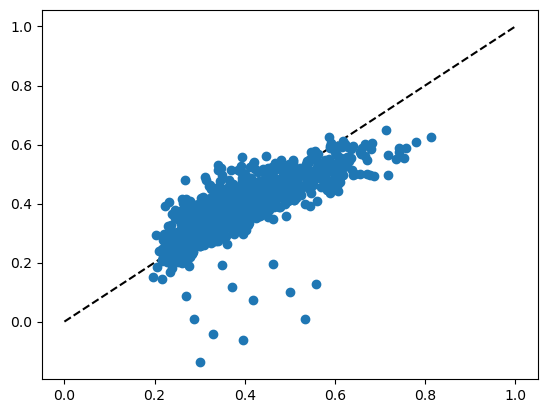

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  40
Deterministic mask will be used
1234
p1 in fast: 0.4999998889492148
len(K_s): 80000
train_samples: 80000
restarted
noise-free output
Seed Training: 1234
p1 in fast: 0.4999998889492148
len(K_s): 40000
train_samples: 80000
restarted
noise-free output
Spacer NRMSE:0
0.004155719694704212 0.5825109294768851


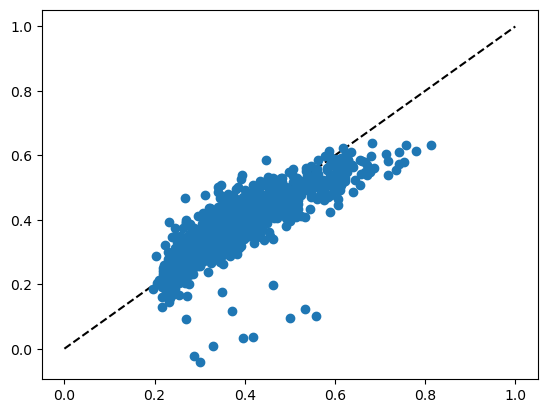

0.48889321880955383

In [27]:
# NARMA10 parameters
Ntrain = 2000
Ntest = 1000

# Net parameters
Nvirt = 40
m0 = 1e-2
bias = True

# Reservoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 10

# Params
params = {
    'theta':1/3, 
    'gamma':.25, 
    'delay_feedback':0, 
    'Nvirt':Nvirt,
    'noise_enable': 'None',
    'noise_seed': 1234,
    'noise_mean':0.0001,
    'noise_std':0.00013,
    'train_sample': Ntrain*Nvirt,
    'test_sample': Ntest*Nvirt
}


spn = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,restart = True,Primep1=None)
transforms = spn.gen_signal_slow_delayed_feedback

# run
(y_test_s,y_pred_s) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transforms,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)

spac = 50
NRMSE_list(y_test_f[spac:],y_pred_f[spac:])

spn = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,restart = True,Primep1=None)
transformf = spn.gen_signal_fast_delayed_feedback

# run
(y_test_f,y_pred_f) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transformf,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)

spac = 50
NRMSE_list(y_test_f[spac:],y_pred_f[spac:])

#### More virtual nodes

initialise before, use restart

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  400
Deterministic mask will be used
1234
p1 in slow: 0.4999998889492148
noise_seed: 1234
noise_mean: 0.0001
len(K_s): 800000
train_samples: 800000
restarted
noise-free output
Seed Training: 1234
p1 in slow: 0.4999998889492148
noise_seed: 1234
noise_mean: 0.0001
len(K_s): 400000
train_samples: 800000
restarted
noise-free output
Spacer NRMSE:0
0.005131619177837779 0.6473038123124766


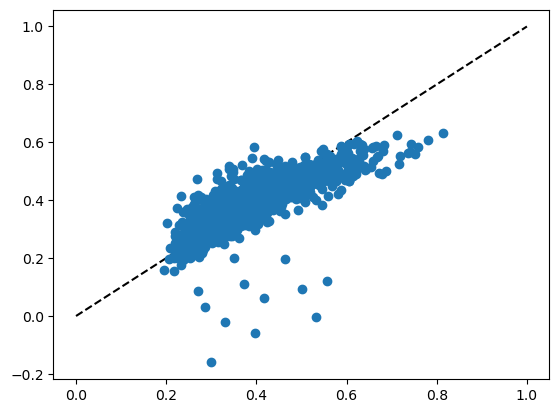

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  400
Deterministic mask will be used
1234
p1 in fast: 0.4999998889492148
len(K_s): 800000
train_samples: 800000
restarted
noise-free output
Seed Training: 1234
p1 in fast: 0.4999998889492148
len(K_s): 400000
train_samples: 800000
restarted
noise-free output
Spacer NRMSE:0
0.0030677718785768536 0.5004866367624409


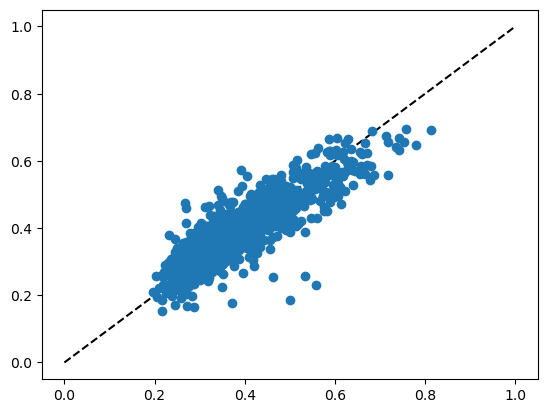

In [28]:
# NARMA10 parameters
Ntrain = 2000
Ntest = 1000

# Net parameters
Nvirt = 400
m0 = 1e-2
bias = True

# Reservoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 10

# Params
params = {
    'theta':1/3, 
    'gamma':.25, 
    'delay_feedback':0, 
    'Nvirt':Nvirt,
    'noise_enable': 'None',
    'noise_seed': 1234,
    'noise_mean':0.0001,
    'noise_std':0.00013,
    'train_sample': Ntrain*Nvirt,
    'test_sample': Ntest*Nvirt
}


spn = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,restart = True,Primep1=None)
transforms = spn.gen_signal_slow_delayed_feedback
transformf = spn.gen_signal_fast_delayed_feedback

# run
(y_test_s,y_pred_s) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transforms,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)
# run
(y_test_f,y_pred_f) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transformf,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)

### redo the task by utilizing the parameters in meeting 

no primep1, inherent p1, no restart, no noisy, slow and fast.
Nv = 400, m0 = 0.003, gamma = .113, beta_prime = 20, theta = 0.3
slow = 0.6341; fast = 0.6056

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  400
Deterministic mask will be used
1234
p1 in slow: 0.49999977789842975
noise_seed: 1234
noise_mean: 0.0001
len(K_s): 800000
train_samples: 800000
skip restarting..
noise-free output
Seed Training: 1234
p1 in slow: 0.5022165398935012
noise_seed: 1234
noise_mean: 0.0001
len(K_s): 400000
train_samples: 800000
skip restarting..
noise-free output
Spacer NRMSE:0
0.005090457474100662 0.6447025112799298


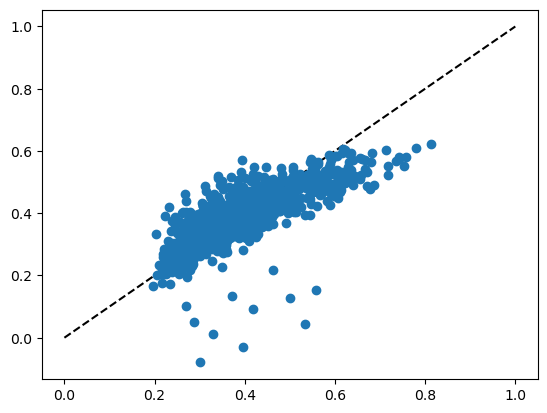

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  400
Deterministic mask will be used
1234
p1 in fast: 0.5019955828232219
len(K_s): 800000
train_samples: 800000
skip restarting..
noise-free output
Seed Training: 1234
p1 in fast: [0.50219566]
len(K_s): 400000
train_samples: 800000
skip restarting..
noise-free output
Spacer NRMSE:0
0.004840395842266869 0.6286680577581536


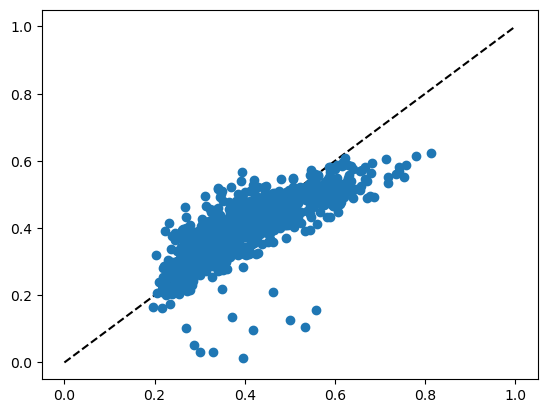

In [29]:
# NARMA10 parameters
Ntrain = 2000
Ntest = 1000

# Net parameters
Nvirt = 400
m0 = 0.003
bias = True

# Reservoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 20

# Params
params = {
    'theta':0.3, 
    'gamma':.113, 
    'delay_feedback':0, 
    'Nvirt':Nvirt,
    'noise_enable': 'None',
    'noise_seed': 1234,
    'noise_mean':0.0001,
    'noise_std':0.00013,
    'train_sample': Ntrain*Nvirt,
    'test_sample': Ntest*Nvirt
}


spn = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,restart = False,Primep1=None)
transforms = spn.gen_signal_slow_delayed_feedback
transformf = spn.gen_signal_fast_delayed_feedback

# run
(y_test_s,y_pred_s) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transforms,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)
# run
(y_test_f,y_pred_f) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transformf,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)